In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:


# Define the directory containing the score files
score_files_dir = "C:/Users/aim2r/Desktop/GUI/V1_code/metrics/"

# Get all score file paths
score_files = os.listdir(score_files_dir)
score_files = [os.path.join(score_files_dir, file) for file in score_files if file.startswith("scores")]



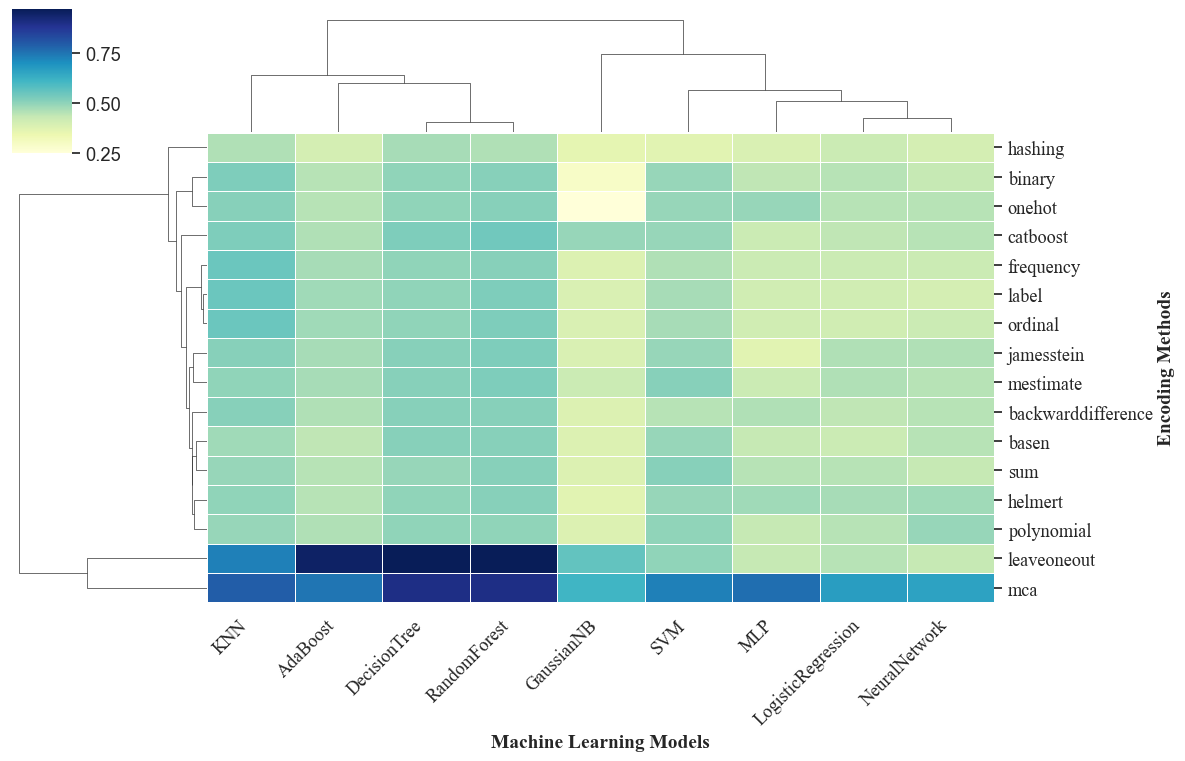

In [5]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the directory containing the score files
score_files_dir = "C:/Users/aim2r/Desktop/GUI/20240730/metrics/"

# Get all score file paths
score_files = os.listdir(score_files_dir)
score_files = [os.path.join(score_files_dir, file) for file in score_files if file.startswith("scores")]

def extract_f1_scores(file_path):
    f1_scores = {}
    with open(file_path, 'r') as file:
        lines = file.readlines()
        i = 0
        while i < len(lines):
            # Ensure there is a line for the encoding method
            if "Encoding method:" in lines[i]:
                encoding_method = lines[i].split(':')[1].strip().replace("_encoded.csv", "")
                i += 2  # Move to the line with the F1 score
                # Check if we're still within bounds and the current line contains the F1 score
                if i < len(lines) and "F1 score:" in lines[i]:
                    f1_score_value = float(lines[i].split(':')[1].strip())
                    f1_scores[encoding_method] = f1_score_value
            i += 1  # Move to the next block of information or next encoding method
    return f1_scores

# Redoing the dictionary creation with the updated function
f1_scores_all = {}
score_files = [file for file in os.listdir(score_files_dir) if file.startswith("scores")]

# Ensure you have a list of machine learning methods corresponding to the files, if not dynamically extract
for file in score_files:
    method_name = file.split('_')[1].split('.')[0]  # Assuming file name format 'scores_METHOD.txt'
    score_file_path = os.path.join(score_files_dir, file)
    f1_scores = extract_f1_scores(score_file_path)
    f1_scores_all[method_name] = f1_scores

# Convert the dictionary to a DataFrame for easy manipulation
f1_scores_df = pd.DataFrame(f1_scores_all)

# Plot clustered heatmap using clustermap
sns.set(font_scale=1.2)
g = sns.clustermap(
    f1_scores_df, 
    cmap="YlGnBu", 
    linewidths=0.5, 
    figsize=(12, 8), 
    col_cluster=True, # Perform clustering on columns
    annot=False
)

# Customize titles and labels
plt.setp(g.ax_heatmap.xaxis.get_majorticklabels(), rotation=45, ha="right", fontname="Times New Roman")
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), fontname="Times New Roman")
g.ax_heatmap.set_xlabel("Machine Learning Models", fontname="Times New Roman", fontsize=14, fontweight='bold')
g.ax_heatmap.set_ylabel("Encoding Methods", fontname="Times New Roman", fontsize=14, fontweight='bold')

# Save the figure in high resolution (600 dpi) to the current folder
g.savefig("Fig2.png", dpi=600)
plt.show()
